# Module-3: Fundamental analysis using Regression

###### Loading required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3.1 Loading dataset , CAPM Analysis and Beta Calculation using regression 

In [2]:
data = pd.read_csv('GOLD.csv')
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
print(data.index.dtype == "datetime64[ns]")
data.head()

True


,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
2017-05-04,28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
2017-05-05,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2017-05-08,28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
2017-05-09,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
2017-05-10,28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [3]:
print(data.info())
data.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 512 entries, 2017-05-04 to 2019-05-03
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     512 non-null    int64  
 1   Open      512 non-null    int64  
 2   High      512 non-null    int64  
 3   Low       512 non-null    int64  
 4   Vol.      512 non-null    object 
 5   Change %  512 non-null    object 
 6   Pred      411 non-null    float64
 7   new       512 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 36.0+ KB
None


,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
2019-04-26,31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
2019-04-30,31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
2019-05-01,31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305
2019-05-02,31203,31420,31425,31160,0.48K,-1.14%,NaN,48.365693
2019-05-03,31341,31250,31500,31163,0.08K,0.44%,NaN,429.924911


In [4]:
empties = np.where(pd.isnull(data))
print('starting_row:',  empties[0][0])

starting_row: 411


'Pred' column has only 411 non-null values out of 512 instances. The missing values at the end of the column.

In [5]:
data_dropped = data.dropna()     # dataset with no missing values
data_to_fill = data.iloc[411:, :]   # dataset with missing/to fill values

In [6]:
X = data_dropped[['Open', 'High', 'Low']].values
pred = data_dropped.Pred.values
new = data_dropped.new.values

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, pred)
print('Pred column score:', lin_reg.score(X, pred))
data_to_fill_pred = lin_reg.predict(data_to_fill[['Open', 'High', 'Low']])    #Predicting the 'Pred' feature
data.Pred = np.hstack((data_dropped['Pred'].values, data_to_fill_pred))  # stacking predicted values to 'Pred' column

Pred column score: 0.796205928915779


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 512 entries, 2017-05-04 to 2019-05-03
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     512 non-null    int64  
 1   Open      512 non-null    int64  
 2   High      512 non-null    int64  
 3   Low       512 non-null    int64  
 4   Vol.      512 non-null    object 
 5   Change %  512 non-null    object 
 6   Pred      512 non-null    float64
 7   new       512 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 36.0+ KB


'Pred' have no missing values

In [9]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X, new)
data_new_pred = lin_reg2.predict(X)
print('new column score:', lin_reg2.score(X, new))

new column score: 0.9052828458304785


###### Since score with 'new' column is high, It is the linear function of the given features and 'Pred' column is polynomial function of the given features

##### Distribution plot of 'Pred'

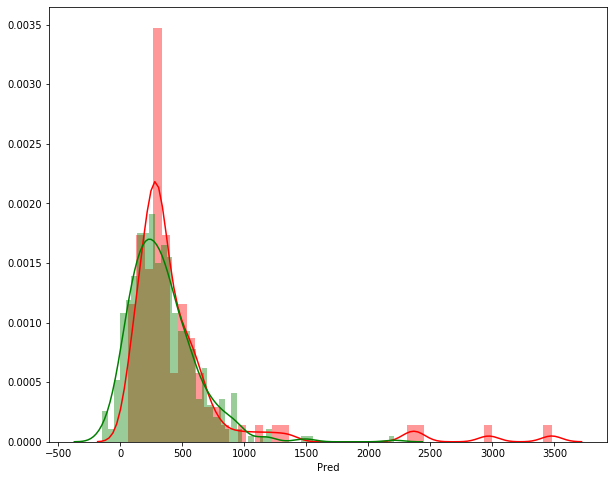

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.distplot(data_to_fill_pred,bins=50, label = "Predicted distribution of 'Pred' " , color="r",ax=ax)
ax = sns.distplot(data_dropped['Pred'], bins=50,label = "Actual distribution of 'Pred' " , color="g",ax=ax)
plt.show()

##### Distribution plot of 'new'

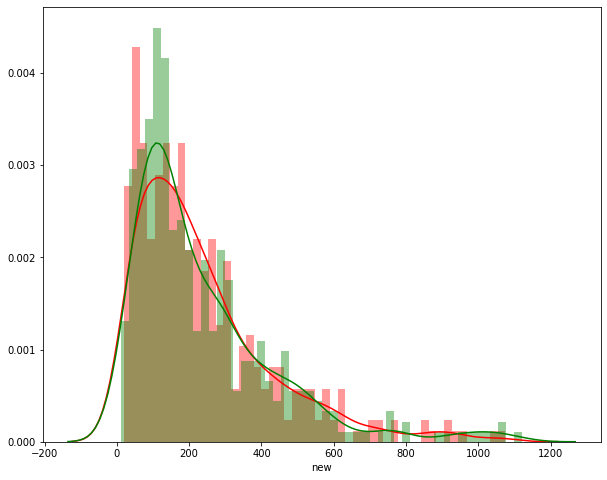

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.distplot(data_new_pred,bins=50, label = "Predicted distribution of 'Pred' " , color="r",ax=ax)
ax = sns.distplot(data_dropped['new'], bins=50,label= "Actual distribution of 'Pred' " , color="g",ax=ax)
plt.show()

###### NOTE : As we can see the distribution plot of 'new' has maximum overlapping with actual distribution. So 'new' feature is linearly related with the input features.

## 3.2  Beta calculation

In [12]:
voltas = pd.read_csv('VOLTAS.csv')
voltas = voltas[voltas["Series"] == "EQ"]
voltas.Date = pd.to_datetime(voltas['Date'])
voltas = voltas.set_index('Date')

nifty = pd.read_csv('Nifty50.csv')
nifty.Date = pd.to_datetime(nifty['Date'])
nifty = nifty.set_index('Date')

In [13]:
voltas.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,VOLTAS,EQ,433.55,436.00,436.4,430.10,433.40,431.85,432.15,696583,3.010253e+08,14160,327583,47.03
2017-05-16,VOLTAS,EQ,431.85,432.00,438.2,430.70,433.00,432.45,433.46,996780,4.320614e+08,19456,366664,36.78
2017-05-17,VOLTAS,EQ,432.45,435.00,435.0,427.25,430.85,430.20,429.93,686830,2.952867e+08,11494,307390,44.75
2017-05-18,VOLTAS,EQ,430.20,425.10,427.0,412.70,414.50,414.10,418.14,1231618,5.149912e+08,18700,571822,46.43
2017-05-19,VOLTAS,EQ,414.10,414.35,419.9,410.95,416.00,415.75,414.98,869457,3.608041e+08,29631,313872,36.10


In [14]:
nifty.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


In [15]:
# ================= Daily Beta ===================
index = nifty['Open'].where(nifty.index == voltas.index)
indexReturn = (index.pct_change()*100).dropna().values.reshape(-1, 1)

stock = voltas['Open Price'].where(nifty.index == voltas.index)
stockReturn = (stock.pct_change()*100).dropna().values.reshape(-1, 1)

reg_for_beta_d = LinearRegression().fit(indexReturn[403:].reshape(-1, 1), stockReturn[403:].reshape(-1, 1))  #len(indexReturn) = 493
print('3 Month\'s Daily Beta = ', reg_for_beta_d.coef_.tolist())

3 Month's Daily Beta =  [[0.8369457606490366]]


In [16]:
daily_covMat = np.cov(indexReturn[403:].reshape(1, -1), stockReturn[403:].reshape(1, -1))
print('3 Month\'s Daily Beta = ', daily_covMat[0][1] / daily_covMat[0][0])

3 Month's Daily Beta =  0.8369457606490369


In [17]:
#================ Monthly Beta =========================
index_m_last = index.loc[index.groupby(index.index.to_period('M')).apply(lambda x: x.index.max())]
index_m_last_return = (index_m_last.pct_change()*100).dropna().values.reshape(-1, 1)

stock_m_last = stock.loc[stock.groupby(stock.index.to_period('M')).apply(lambda x: x.index.max())]
stock_m_last_return = (stock_m_last.pct_change()*100).dropna().values.reshape(-1, 1)

reg_for_beta_M = LinearRegression().fit(index_m_last_return.reshape(-1,1), stock_m_last_return.reshape(-1, 1))
print('Monthly Beta:', reg_for_beta_M.coef_.tolist())

Monthly Beta: [[1.1726552636090162]]


In [22]:
monthly_covMat = np.cov(index_m_last_return.reshape(1, -1), stock_m_last_return.reshape(1, -1))
print('Monthly Beta = ', monthly_covMat[0][1] / monthly_covMat[0][0])

Monthly Beta =  1.1726552636090166


Here Beta>1 for monthly Beta. If Beta is -ve then it indicates opposite relationship with the market.